In [3]:
import numpy as np
import pandas as pd
import joblib

In [4]:
raw_data = pd.read_csv("train.csv")
raw_data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [6]:
raw_data.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [7]:
corr_mat = raw_data.corr(numeric_only=True)
corr_mat["rainfall"].sort_values()

sunshine        -0.555287
maxtemp         -0.079304
pressure        -0.049886
temparature     -0.049660
mintemp         -0.026841
winddirection   -0.006939
day             -0.000462
id               0.033674
dewpoint         0.081965
windspeed        0.111625
humidity         0.454213
cloud            0.641191
rainfall         1.000000
Name: rainfall, dtype: float64

In [8]:
raw_data["cloud"].describe()

count    2190.000000
mean       75.721918
std        18.026498
min         2.000000
25%        69.000000
50%        83.000000
75%        88.000000
max       100.000000
Name: cloud, dtype: float64

<Axes: >

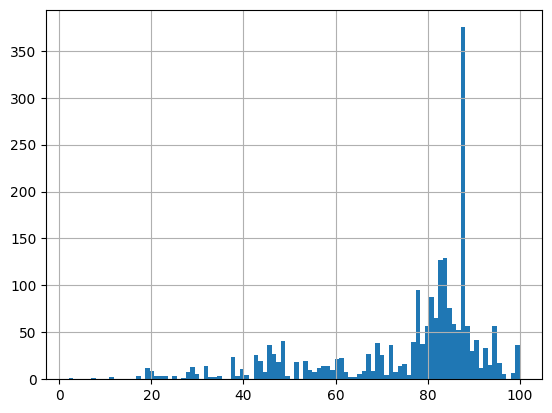

In [9]:
raw_data["cloud"].hist(bins=100)

In [10]:
raw_data["rainfall"].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

<Axes: >

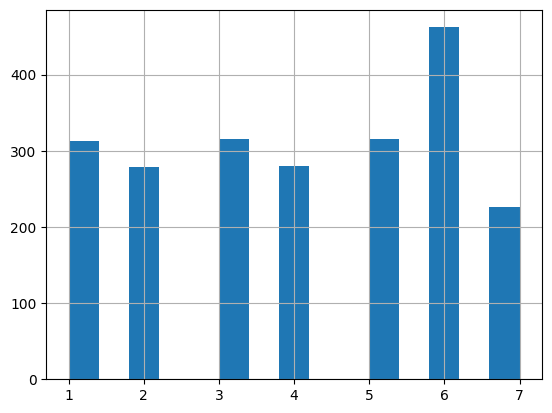

In [11]:
raw_data["cloud_category"] = pd.cut(raw_data["cloud"],
                                    bins=[0, 50, 70, 80, 83.5, 87.5, 90, np.inf],
                                    labels=[1, 2, 3, 4, 5, 6, 7]
                                    )
raw_data["cloud_category"].hist(bins=15)

In [12]:
attribs = list(raw_data)
attribs.remove("id")
attribs.remove("rainfall")
attribs.remove("cloud_category")
attribs

['day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed']

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_data, raw_data["cloud_category"]):
    strat_trainset = raw_data.loc[train_index]
    strat_testset = raw_data.loc[test_index]

X_train = pd.DataFrame(strat_trainset, columns=list(raw_data))
X_test = pd.DataFrame(strat_testset, columns=list(raw_data))

y_train = X_train[["rainfall"]]
y_test = X_test[["rainfall"]]

X_train.drop(columns=["rainfall"], inplace=True)
X_test.drop(columns=["rainfall"], inplace=True)

X_train.drop(columns=["cloud_category"], inplace=True)
X_test.drop(columns=["cloud_category"], inplace=True)

In [14]:
X_train

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
949,949,220,1006.4,31.3,28.8,27.3,26.4,87.0,84.0,1.2,220.0,13.9
83,83,84,1010.7,24.2,23.0,21.4,17.0,86.0,80.0,1.1,70.0,9.8
1114,1114,20,1021.3,19.6,17.6,15.7,12.6,64.0,73.0,5.2,60.0,20.2
1339,1339,245,1010.2,31.7,28.2,25.9,23.8,79.0,88.0,1.6,70.0,22.0
1776,1776,317,1015.1,27.5,23.7,22.2,21.3,91.0,93.0,5.9,70.0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2008,184,1008.1,31.0,28.1,26.8,25.1,81.0,84.0,2.1,190.0,15.9
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1123,1123,29,1017.6,24.8,21.3,19.8,20.1,91.0,89.0,0.2,50.0,37.5
291,291,292,1017.1,26.0,24.9,22.3,22.2,81.0,84.0,2.4,70.0,12.0


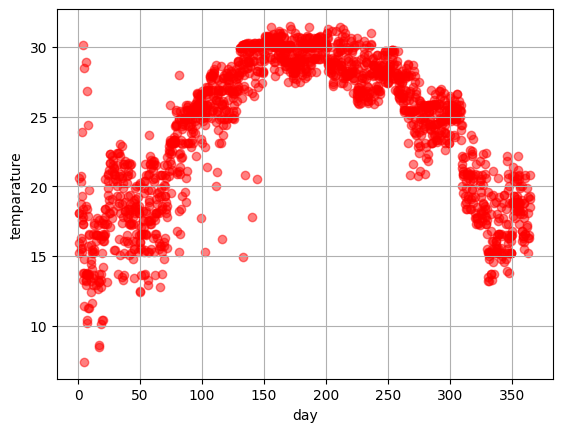

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_scatter(x_param, y_param, alpha=1, c='r'):
    plt.scatter(X_train[x_param], X_train[y_param], alpha=alpha, c=c)
    plt.xlabel(x_param)
    plt.ylabel(y_param)
    plt.grid(True)
    plt.show()


show_scatter("day", "temparature", alpha=0.5)

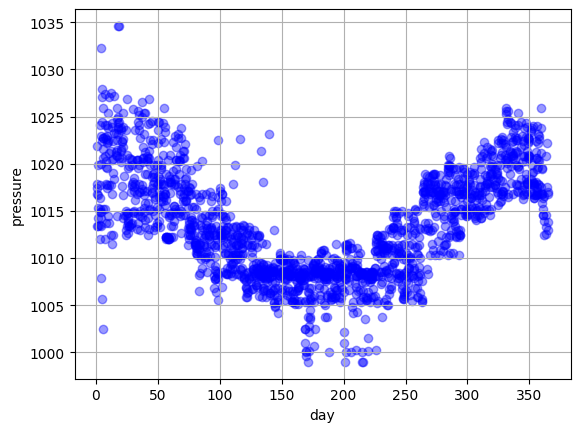

In [16]:
show_scatter("day", "pressure", c='b', alpha=0.4)

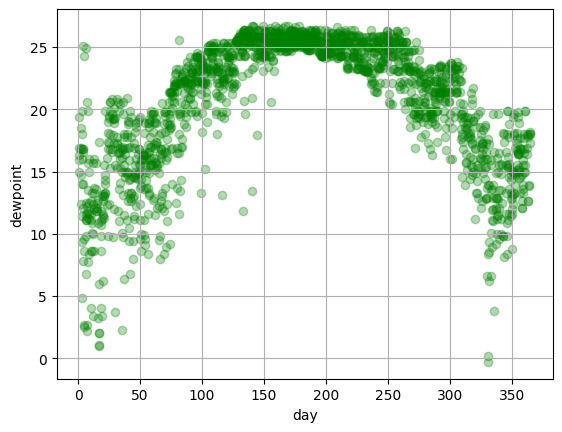

In [17]:
show_scatter("day", "dewpoint", alpha=0.3, c='g')

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

trans_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler()),
    ]
)

full_pipeline = ColumnTransformer([
    ("pipe", trans_pipeline, attribs)
])

tr_data_train = full_pipeline.fit_transform(X_train)
tr_data_test = full_pipeline.transform(X_test)


In [19]:
# joblib.dump(full_pipeline, "full_pipeline.joblib")

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='log_loss')
sgd_clf.fit(tr_data_train, y_train.values.ravel())

SGDClassifier(loss='log_loss', random_state=42)

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

y_train_scores = sgd_clf.decision_function(tr_data_train)

# y_train_scores



In [22]:
roc_auc_score(y_train.values.ravel(), y_train_scores)

np.float64(0.8959803680118215)

In [23]:
y_test_scores = sgd_clf.decision_function(tr_data_test)
roc_auc_score(y_test.values.ravel(), y_test_scores)

np.float64(0.8811807095343682)

In [24]:
# joblib.dump(sgd_clf, "sgd_clf_transformed.pkl")

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(tr_data_train, y_train.values.ravel())
rfc_pred = rfc_model.predict_proba(tr_data_train)
roc_auc_score(y_train.values.ravel(), rfc_pred[:, 1])


np.float64(1.0)

In [26]:
from sklearn.model_selection import cross_val_predict

rfc_y_scores_train = cross_val_predict(rfc_model, tr_data_train, y_train.values.ravel(), method="predict_proba", cv=3)
roc_auc_score(y_train.values.ravel(), rfc_y_scores_train[:, 1])


np.float64(0.877747774689512)

In [27]:
rfc_y_scores_test = rfc_model.predict_proba(tr_data_test)
roc_auc_score(y_test.values.ravel(), rfc_y_scores_test[:, 1])

np.float64(0.8873752771618625)

In [28]:
# joblib.dump(rfc_model, "random_forest_clf.pkl")

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=295, weights="distance")

knn_clf.fit(tr_data_train, y_train.values.ravel())
knn_pred = knn_clf.predict_proba(tr_data_train)
knn_pred = cross_val_predict(knn_clf, tr_data_train, y_train.values.ravel(), cv=3, method="predict_proba")
roc_auc_score(y_train.values.ravel(), knn_pred[:, 1])

np.float64(0.8824033353270238)

In [30]:
knn_pred_test = knn_clf.predict_proba(tr_data_test)
roc_auc_score(y_test.values.ravel(), knn_pred_test[:, 1])

np.float64(0.8743625277161864)

In [31]:
# joblib.dump(knn_clf, "knn_model.pkl")

In [32]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear")
svc_model.fit(tr_data_train, y_train.values.ravel())
svc_proba_train = svc_model.decision_function(tr_data_train)
roc_auc_score(y_train.values.ravel(), svc_proba_train)

np.float64(0.8959979593990781)

In [33]:
svc_proba_test = svc_model.decision_function(tr_data_test)
roc_auc_score(y_test.values.ravel(), svc_proba_test)

np.float64(0.8844235033259423)

In [34]:
# joblib.dump(svc_model, "svc_model.pkl")

In [35]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression()

logistic_model.fit(tr_data_train, y_train.values.ravel())
# knn_pred = logistic_model.predict_proba(tr_data_train)
logistic_pred_train = cross_val_predict(logistic_model, tr_data_train, y_train.values.ravel(), cv=3, method="predict_proba")
roc_auc_score(y_train.values.ravel(), logistic_pred_train[:, 1])

np.float64(0.8932114836576012)

In [36]:
logistic_pred_test = logistic_model.predict_proba(tr_data_test)
roc_auc_score(y_test.values.ravel(), logistic_pred_test[:, 1])

np.float64(0.8855044345898004)

In [37]:
# joblib.dump(logistic_model, "logistic_model.pkl")

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "penalty" : ["l2", None],
        "solver": ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter": [150, 200, 300, 500, 1000],
        
    }, 
    {
        "penalty" : ["l2", None, "l1"],
        "solver":["saga"],
        "max_iter": [150, 200, 300, 500, 1000],
    },
    {
        "penalty" : ["l2", "l1"],
        "solver":["liblinear"],
        "max_iter": [150, 200, 300, 500, 1000],
        "intercept_scaling" : [2.16135, 2.1615, 2.16165],
    },
    {
        "penalty" : ["l2"],
        "solver":["liblinear"],
        "max_iter": [150, 200, 300, 500],
        "dual" : [True, False],
    },
    {
        "penalty" : ["elasticnet"],
        "solver":["saga"],
        "max_iter": [150, 200, 300, 500, 1000],
        "l1_ratio" : [1, 0.75, 0.5, 0.25, 0]
    }
]
try:
    best_logistic_model = joblib.load("best_logistic_model.pkl")
except Exception as e:
    hyp_logistic_model = LogisticRegression()
    grid_search = GridSearchCV(hyp_logistic_model, param_grid, return_train_score=True, cv=3, scoring="roc_auc")
    grid_search.fit(tr_data_train, y_train.values.ravel())
    best_logistic_model = grid_search.best_estimator_

In [39]:
logistic_pred_train = cross_val_predict(best_logistic_model, tr_data_train, y_train.values.ravel(), cv=3, method="predict_proba")
roc_auc_score(y_train.values.ravel(), logistic_pred_train[:, 1])

np.float64(0.8934419308306654)

In [40]:
logistic_pred_test = best_logistic_model.predict_proba(tr_data_test)
roc_auc_score(y_test.values.ravel(), logistic_pred_test[:, 1])

np.float64(0.8860864745011087)

In [41]:
# joblib.dump(best_logistic_model, "best_logistic_model.pkl")

In [ ]:
param_grid_sgd = [
    # {
    #     "loss" : ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", 'squared_epsilon_insensitive'],
    #     "penalty" : ["l1", "l2", "elasticnet", None],
    #     "max_iter": [500, 1000, 1500],
    #     "learning_rate": ["optimal"],
    # },
    {
        "loss" : ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", 'squared_epsilon_insensitive'],
        "penalty" : ["l1", "l2", "elasticnet", None],
        "max_iter": [3000, 3200],
        "learning_rate": ["constant", "invscaling", "adaptive"],
        "eta0": [0.1, 0.5, 1.25, 1.5, 1.65, 1.75]
    }
]

sgd_model = SGDClassifier()
grid_search_sgd = GridSearchCV(sgd_model, param_grid_sgd, return_train_score=True, cv=3, scoring="roc_auc")
grid_search_sgd.fit(tr_data_train, y_train.values.ravel())
best_sgd_model = grid_search_sgd.best_estimator_

In [ ]:
grid_search_sgd.best_params_

{'eta0': 1.75,
 'learning_rate': 'adaptive',
 'loss': 'squared_hinge',
 'max_iter': 3200,
 'penalty': 'l1'}

In [ ]:
sgd_pred_train = cross_val_predict(best_sgd_model, tr_data_train, y_train.values.ravel(), cv=3, method="decision_function")
roc_auc_score(y_train.values.ravel(), sgd_pred_train)

np.float64(0.8936952468071633)

In [ ]:
sgd_pred_train = best_sgd_model.decision_function(tr_data_test)
roc_auc_score(y_test.values.ravel(), sgd_pred_train)

np.float64(0.8842849223946785)

In [ ]:
joblib.dump(best_sgd_model, "best_sgd_model.pkl")

['best_sgd_model.pkl']

In [ ]:
trans_pipeline_no_day = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler()),
    ]
)

attribs.remove("day")
attribs.remove("winddirection")
full_pipeline_no_day = ColumnTransformer([
    ("pipe", trans_pipeline_no_day, attribs)
])

tr_data_train_no_day = full_pipeline_no_day.fit_transform(X_train)
tr_data_test_no_day = full_pipeline_no_day.transform(X_test)

In [ ]:
# joblib.dump(full_pipeline_no_day, "full_pipeline_no_day.joblib")

In [ ]:
param_grid = [
    {
        "penalty" : ["l2", None],
        "solver": ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter": [300, 500, 1000],
        
    }, 
    {
        "penalty" : ["l2", None, "l1"],
        "solver":["saga"],
        "max_iter": [150, 200, 300, 500, 1000],
    },
    {
        "penalty" : ["l2", "l1"],
        "solver":["liblinear"],
        "max_iter": [150, 200, 300, 500, 1000],
        "intercept_scaling" : [2.16135, 2.1615, 2.16165],
    },
    {
        "penalty" : ["l2"],
        "solver":["liblinear"],
        "max_iter": [150, 200, 300, 500],
        "dual" : [True, False],
    },
    {
        "penalty" : ["elasticnet"],
        "solver":["saga"],
        "max_iter": [150, 200, 300, 500, 1000],
        "l1_ratio" : [1, 0.75, 0.5, 0.25, 0]
    }
]
# try:
#     best_logistic_model = joblib.load("best_logistic_model.pkl")
# except Exception as e:
hyp_logistic_model = LogisticRegression()
grid_search = GridSearchCV(hyp_logistic_model, param_grid, return_train_score=True, cv=3,scoring="roc_auc")
grid_search.fit(tr_data_train_no_day, y_train.values.ravel())
best_logistic_model_no_day = grid_search.best_estimator_

In [ ]:
grid_search.best_params_

{'intercept_scaling': 2.16135,
 'max_iter': 300,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
logistic_pred_train_no_day = cross_val_predict(best_logistic_model_no_day, tr_data_train_no_day, y_train.values.ravel(), cv=3, method="predict_proba")
roc_auc_score(y_train.values.ravel(), logistic_pred_train_no_day[:, 1])

np.float64(0.8939028251767935)

In [ ]:
logistic_pred_test_no_day = best_logistic_model_no_day.predict_proba(tr_data_test_no_day)
roc_auc_score(y_test.values.ravel(), logistic_pred_test_no_day[:, 1])

np.float64(0.8869733924611973)

In [ ]:
joblib.dump(best_logistic_model_no_day, "best_logistic_model_no_day.pkl")

['best_logistic_model_no_day.pkl']

In [ ]:
list(X_train)

['id',
 'day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed']

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddDewpointDepression(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dew_point_depression = X[:, 4] - X[:, 6]
        return np.c_[X, dew_point_depression]

In [ ]:
add_feature = AddDewpointDepression()
X_train_more_feature = add_feature.transform(X_train.values)

In [2]:
X_train_more_feature.shape

NameError: name 'X_train_more_feature' is not defined

In [ ]:
trans_pipeline_more_feature = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        ("add_feature", AddDewpointDepression()),
        ("scale", StandardScaler()),
    ]
)


full_pipeline_more_feature = ColumnTransformer([
    ("pipe", trans_pipeline_more_feature, attribs)
])

tr_data_train_more_feature = full_pipeline_more_feature.fit_transform(X_train)
tr_data_test_more_feature = full_pipeline_more_feature.transform(X_test)

In [93]:
tr_data_train_more_feature.shape

(1752, 11)

In [80]:
param_grid = [
    {
        "penalty" : ["l2", None],
        "solver": ["lbfgs", "newton-cg", "sag", "saga"],
        "max_iter": [300, 500, 1000],
        "random_state":[42]
        
    }, 
    {
        "penalty" : ["l2", None, "l1"],
        "solver":["saga"],
        "max_iter": [150, 300, 500, 1000],
        "random_state":[42]
    },
    {
        "penalty" : ["l2", "l1"],
        "solver":["liblinear"],
        "max_iter": [40, 50, 100, 150, 200, 300],
        "intercept_scaling" : [2.16135, 2.1615, 2.16165],
        "random_state":[42]
    },
    {
        "penalty" : ["l2"],
        "solver":["liblinear"],
        "max_iter": [150, 200, 300, 500],
        "dual" : [True, False],
        "random_state":[42]
    },
    {
        "penalty" : ["elasticnet"],
        "solver":["saga"],
        "max_iter": [150, 200, 300, 500, 1000],
        "l1_ratio" : [1, 0.75, 0.5, 0.25, 0],
        "random_state":[42]
    }
]
# try:
#     best_logistic_model = joblib.load("best_logistic_model.pkl")
# except Exception as e:
hyp_logistic_model = LogisticRegression()
grid_search = GridSearchCV(hyp_logistic_model, param_grid, return_train_score=True, cv=3,scoring="roc_auc")
grid_search.fit(tr_data_train_more_feature, y_train.values.ravel())
best_logistic_model_more_feature = grid_search.best_estimator_

/home/ashmit/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ashmit/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [81]:
grid_search.best_params_

{'intercept_scaling': 2.16135,
 'max_iter': 40,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

In [82]:
logistic_pred_train_more_feature = cross_val_predict(best_logistic_model_more_feature, tr_data_train_more_feature, y_train.values.ravel(), cv=3, method="predict_proba")
roc_auc_score(y_train.values.ravel(), logistic_pred_train_more_feature[:, 1])

np.float64(0.8940259648875911)

In [83]:
logistic_pred_test_more_feature = best_logistic_model_more_feature.predict_proba(tr_data_test_more_feature)
roc_auc_score(y_test.values.ravel(), logistic_pred_test_more_feature[:, 1])

np.float64(0.8868625277161862)